<a href="https://colab.research.google.com/github/TranPhu1999/Parallel_programing_face_mask_detection/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÁO CÁO ĐỒ ÁN MÔN "LẬP TRÌNH SONG SONG ỨNG DỤNG"
### GVHD: TRẦN TRUNG KIÊN
### THỰC HIỆN: Nhóm 02
### DANH SÁCH THÀNH VIÊN
  1. 1712667 - Lê Hữu Phúc
  2. 1712664 -Trần Đức Phú
  3. 1612355 - Lê Kinh Luân



# 1. MÔ TẢ ỨNG DỤNG:


*   **Tên ứng dụng:** Nhận diện người đeo khẩu trang với mô hình yolov3

*   **Input:** Một tấm ảnh người có/ không có/ đeo sai khẩu trang
*   **Output:** Ảnh được đánh bounding box kèm nhãn mask/ no_mask/ incorrect_mask


*   **Ý nghĩa thực tế:** Khi tình hình dịch đang còn lây lan mạnh trên cả nước thì việc đeo khẩu trang ra đường thực sự là rất cần thiết vì nó không chỉ bảo vệ bản thân mà còn bảo vệ cho những người xung quanh nên việc nhận diện người đeo khẩu trang sai cách thật sự rất quan trọng


*   **Lý do tăng tốc:** việc xác nhận người đeo khẩu trang sai cách rất quan trọng nên việc tăng tốc mô hình trên ảnh sẽ là tiền đề tốt để thực hiện chạy mô hình với dữ liệu video thực tế, vốn cần độ chính xác và tốc độ xử lý cao.

**Input:** ảnh người chụp người nơi công cộng

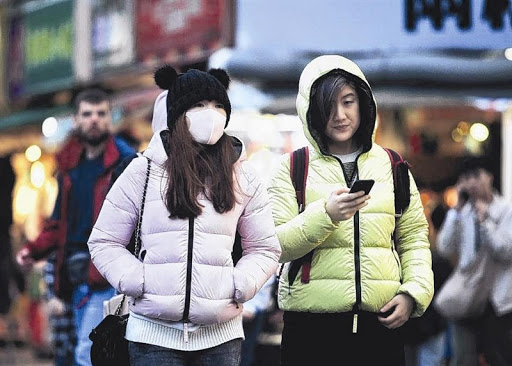

**Output:** bounding box ứng với mỗi khuôn mặt người trong ảnh đi kèm với phân lớp và độ chính xác việc dự đoán

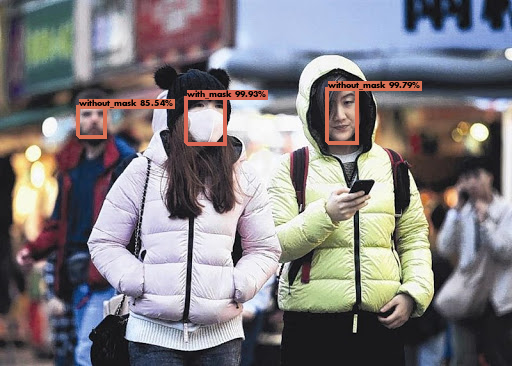

# 2. DATASET



*   Tập dữ liệu **Face Mask Detection** được lấy từ Kaggle. Để biết thêm về bộ dữ liệu xin hãy nhấn vào [đây](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection)

*   Tập dữ liệu này chứa 853 hình ảnh thuộc 3 lớp: Đeo khẩu trang, không đeo khẩu trang và đeo khẩu trang sai.



# 3. TUẦN TỰ

## 3.1. Phân tích và thiết kế




### **Worklflow**

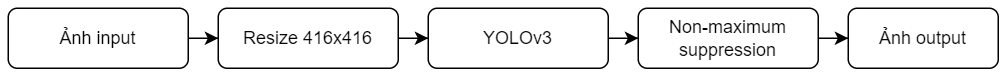

### **Cấu trúc của mô hình YOLOv3**
Là một mạng CNN bao gồm 106 layers, trong đó 
- 53 Layers đầu là mạng trích xuất đặc trưng Darknet (màu tím trong biểu đồ.
- 53 Layers sau hệ thống lớp tích chập để dự đoán kết quả đầu ra.

YOLOv3 thực hiện dự đoán kết quả ở 3 cấp độ bằng cách chia ảnh ảnh thành các ô (Grid cell) nhỏ, kích thước ô ở 3 cấp độ là:
- Cấp độ 1 (52x52): Phát hiện vật thể nhỏ
- Cấp độ 2 (26x26): Phát hiện vật thể trung bình
- Cấp độ 3 (13x13): Phát hiện vật thể lớn

Mô hình có tận dụng kiến trúc Feature Pyramid Networks (FPN) để tận dụng tối ưu các đặc trưng được trích xuất từ phần dưới cho các kiến trúc ở trên. Tức các feature ở cấp độ 3 ngoài để dự đoán các vật thể lớn còn được tái sử dụng và kết hợp (Concatenate) với các đặc trưng ở cấp độ 2 để dự đoán các vật thể trung bình. Tương tự như các đặc trung ở cấp độ 2 và cấp độ 1

|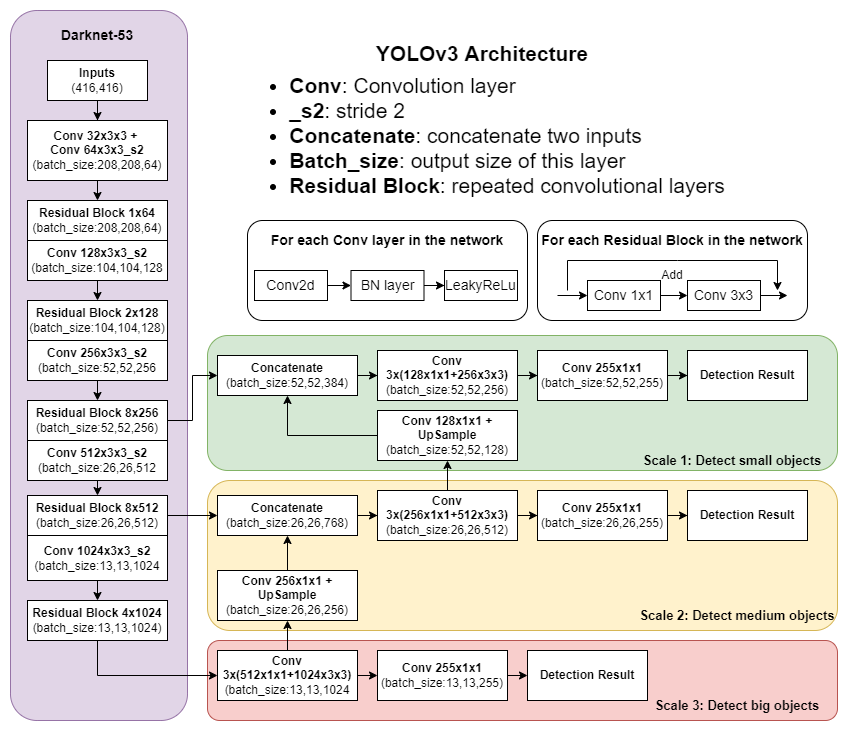|
|:--:|

#### Lớp tích chập (Convolution layers)

- Là thành phần cơ bản nhất của một mô hình Convolution Neural Network. Mỗi lớp tích chập bao gồm nhiều ma trận vuông (hay còn gọi là kernel hay filter), các giá trị trong ma trận vuông này là các giá trị mà mô hình phải học. 

|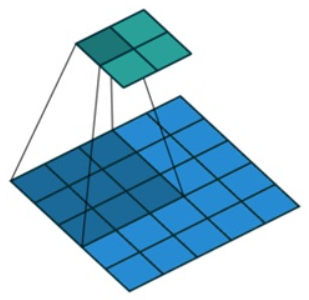|
|:--:|

- Trong ảnh ở trên, một ma trận vuông 3x3 di chuyển qua tất cả các pixel của một ảnh và thực hiện phép tích chập (Convolution) với một ảnh input có kích thước 5x5 với stride = 2 (số ô mà ma trận vuông nhảy qua sau mỗi lần di chuyển). Output là một ma trận có kích trước 2x2. Ma trận này được gọi là đặc trưng của bức ảnh trên sau thực hiện tích chập.

|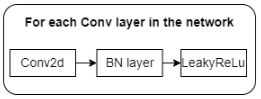|
|:--:|

- Trong YOLOv3, tất cả các lớp Convolution đều được theo sau bởi 2 lớp Batch Normalization và hàm kích hoạt Leaky ReLu

#### Residual Block

|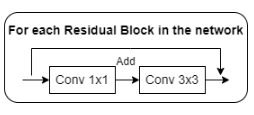|
|:--:|

- Residual hay còn được gọi Skip Connection, theo sau các lớp tích chập, được dùng để kết hợp output của lớp tích chập trước đó với output của lớp tích chập hiện tại.
- Với các Deep Neural Network như YOLOv3, các Residual Block này sẽ giúp tránh cho việc mô hình bị overfiting.

#### Concatenate Layer

|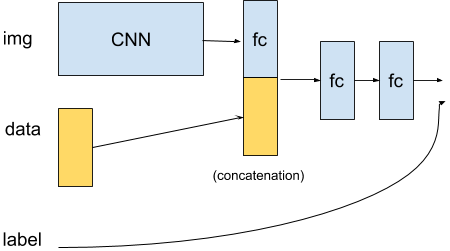|
|:--:|

Hiểu đơn giản là kết hợp output của 2 lớp tích chập lại với nhau

#### Upsampling Layers

|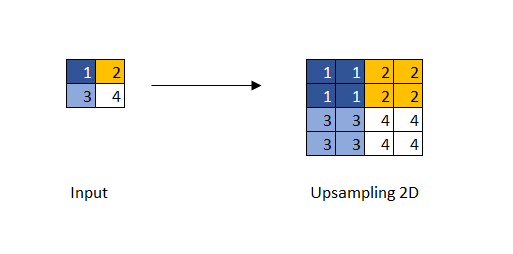|
|:--:|

Có tác dụng tăng kích thước của một ma trận đầu vào

#### Batch normalization

Chuẩn hóa các đặc trưng về trạng trái zero-mean (trung bình bằng 0) với độ lệch chuẩn bằng 1, tác dụng của BN trong quá trình huấn luyện mạng học sâu bao gồm:
- Loại bỏ vấn đề high variance, tức các đặc trưng có các thành phần rất lớn hoặc rất nhỏ, dẫn đến trong quá trình học, các vector gradient sẽ có giá trị quá lớn hoặc quá nhỏ dẫn đến việc học của model không được ổn định.
- Loại bỏ vấn đề vanishing gradient khiến cho các trọng số không thể học được
- Có vai trò giảm thiểu overfiting

#### Leaky ReLu activation

|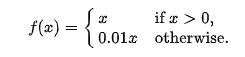|
|:--:|

Nếu giá trị trong kernel dương thì được đi qua còn nếu âm trả về một số âm rất nhỏ.

### **Output của mô hình YOLO:** 
Output của model ở cả 3 scale như sau

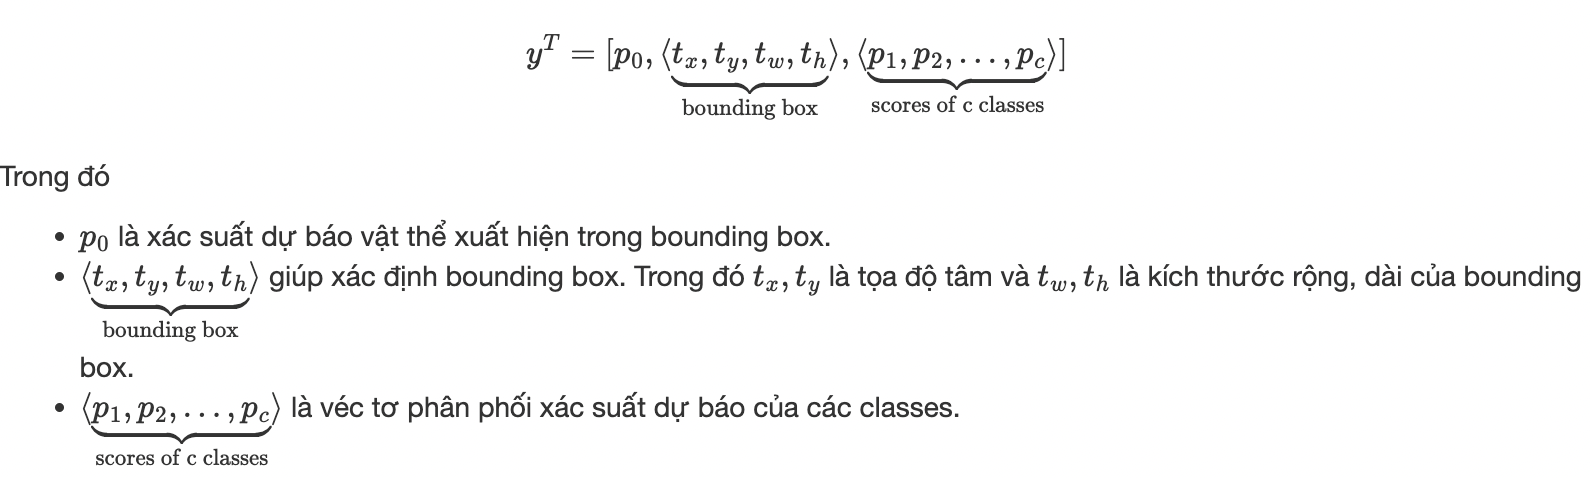

### **Non-maximum suppression**
Output đầu ra của mô hình sẽ có nhiều bounding box chồng lên nhau và dự đoán cùng một vật thể. Công việc của Non-maximum Suppression là loại bỏ bớt các box trùng nhau này

|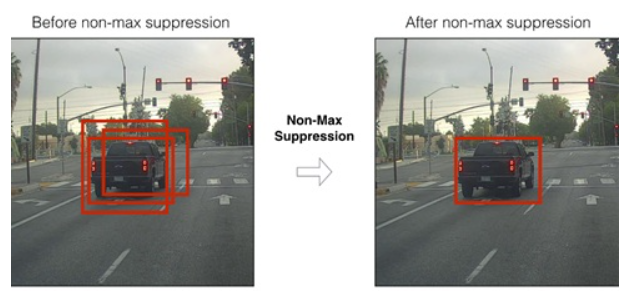|
|:--:|

## 3.2. Code tuần tự có sử dụng tensorflow

In [1]:
import numba
from absl import flags
from absl.flags import FLAGS
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import (
    Add,
    Concatenate,
    Conv2D,
    Input,
    Lambda,
    LeakyReLU,
    MaxPool2D,
    UpSampling2D,
    ZeroPadding2D,
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import (
    binary_crossentropy,
    sparse_categorical_crossentropy
)


In [2]:
class BatchNormalization(tf.keras.layers.BatchNormalization):
    """
    Make trainable=False freeze BN for real (the og version is sad)
    """

    def call(self, x, training=False):
        if training is None:
            training = tf.constant(False)
        training = tf.logical_and(training, self.trainable)
        return super().call(x, training)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
yolo_max_boxes = 100
yolo_iou_threshold = 0.5
yolo_score_threshold = 0.5
# customize model through the following parameters
flags.DEFINE_integer('yolo_max_boxes', 10, 'maximum number of detections at one time')
flags.DEFINE_float('yolo_iou_threshold', 0.5, 'iou threshold')
flags.DEFINE_float('yolo_score_threshold', 0.5, 'score threshold')

yolo_anchors = np.array([(10, 13), (16, 30), (33, 23), (30, 61), (62, 45),
                         (59, 119), (116, 90), (156, 198), (373, 326)],
                        np.float32) / 416
yolo_anchor_masks = np.array([[6, 7, 8], [3, 4, 5], [0, 1, 2]])

In [5]:
def DarknetConv(x, filters, size, strides=1, batch_norm=True):
    if strides == 1:
        padding = 'same'
    else:
        x = ZeroPadding2D(((1, 0), (1, 0)))(x)  # top left half-padding
        padding = 'valid'
    x = Conv2D(filters=filters, kernel_size=size,
               strides=strides, padding=padding,
               use_bias=not batch_norm, kernel_regularizer=l2(0.0005))(x)
    if batch_norm:
        x = BatchNormalization()(x)
        x = LeakyReLU(alpha=0.1)(x)
    return x

In [6]:
def DarknetResidual(x, filters):
    prev = x
    x = DarknetConv(x, filters // 2, 1)
    x = DarknetConv(x, filters, 3)
    x = Add()([prev, x])
    return x

In [7]:
def DarknetBlock(x, filters, blocks):
    x = DarknetConv(x, filters, 3, strides=2)
    for _ in range(blocks):
        x = DarknetResidual(x, filters)
    return x

In [8]:
def Darknet(name=None):
    x = inputs = Input([None, None, 3])
    x = DarknetConv(x, 32, 3)
    x = DarknetBlock(x, 64, 1)
    x = DarknetBlock(x, 128, 2)  # skip connection
    x = x_36 = DarknetBlock(x, 256, 8)  # skip connection
    x = x_61 = DarknetBlock(x, 512, 8)
    x = DarknetBlock(x, 1024, 4)
    return tf.keras.Model(inputs, (x_36, x_61, x), name=name)

In [9]:
def YoloConv(filters, name=None):
    def yolo_conv(x_in):
        if isinstance(x_in, tuple):
            inputs = Input(x_in[0].shape[1:]), Input(x_in[1].shape[1:])
            x, x_skip = inputs

            # concat with skip connection
            x = DarknetConv(x, filters, 1)
            x = UpSampling2D(2)(x)
            x = Concatenate()([x, x_skip])
        else:
            x = inputs = Input(x_in.shape[1:])

        x = DarknetConv(x, filters, 1)
        x = DarknetConv(x, filters * 2, 3)
        x = DarknetConv(x, filters, 1)
        x = DarknetConv(x, filters * 2, 3)
        x = DarknetConv(x, filters, 1)
        return Model(inputs, x, name=name)(x_in)
    return yolo_conv

In [10]:
def YoloOutput(filters, anchors, classes, name=None):
    def yolo_output(x_in):
        x = inputs = Input(x_in.shape[1:])
        x = DarknetConv(x, filters * 2, 3)
        x = DarknetConv(x, anchors * (classes + 5), 1, batch_norm=False)
        x = Lambda(lambda x: tf.reshape(x, (-1, tf.shape(x)[1], tf.shape(x)[2],
                                            anchors, classes + 5)))(x)
        return tf.keras.Model(inputs, x, name=name)(x_in)
    return yolo_output

In [11]:
def yolo_boxes(pred, anchors, classes):
    # pred: (batch_size, grid, grid, anchors, (x, y, w, h, obj, ...classes))
    grid_size = tf.shape(pred)[1]
    box_xy, box_wh, objectness, class_probs = tf.split(
        pred, (2, 2, 1, classes), axis=-1)

    box_xy = tf.sigmoid(box_xy)
    objectness = tf.sigmoid(objectness)
    class_probs = tf.sigmoid(class_probs)
    pred_box = tf.concat((box_xy, box_wh), axis=-1)  # original xywh for loss

    # !!! grid[x][y] == (y, x)
    grid = tf.meshgrid(tf.range(grid_size), tf.range(grid_size))
    grid = tf.expand_dims(tf.stack(grid, axis=-1), axis=2)  # [gx, gy, 1, 2]

    box_xy = (box_xy + tf.cast(grid, tf.float32)) / \
        tf.cast(grid_size, tf.float32)
    box_wh = tf.exp(box_wh) * anchors

    box_x1y1 = box_xy - box_wh / 2
    box_x2y2 = box_xy + box_wh / 2
    bbox = tf.concat([box_x1y1, box_x2y2], axis=-1)

    return bbox, objectness, class_probs, pred_box

In [12]:
def yolo_nms(outputs, anchors, masks, classes):
    # boxes, conf, type
    b, c, t = [], [], []

    for o in outputs:
        b.append(tf.reshape(o[0], (tf.shape(o[0])[0], -1, tf.shape(o[0])[-1])))
        c.append(tf.reshape(o[1], (tf.shape(o[1])[0], -1, tf.shape(o[1])[-1])))
        t.append(tf.reshape(o[2], (tf.shape(o[2])[0], -1, tf.shape(o[2])[-1])))

    bbox = tf.concat(b, axis=1)
    confidence = tf.concat(c, axis=1)
    class_probs = tf.concat(t, axis=1)

    scores = confidence * class_probs
    boxes, scores, classes, valid_detections = tf.image.combined_non_max_suppression(
        boxes=tf.reshape(bbox, (tf.shape(bbox)[0], -1, 1, 4)),
        scores=tf.reshape(
            scores, (tf.shape(scores)[0], -1, tf.shape(scores)[-1])),
        max_output_size_per_class=yolo_max_boxes,
        max_total_size=yolo_max_boxes,
        iou_threshold=yolo_iou_threshold,
        score_threshold=yolo_score_threshold
    )

    return boxes, scores, classes, valid_detections

In [13]:
def YoloV3(size=None, channels=3, anchors=yolo_anchors,
           masks=yolo_anchor_masks, classes=80, training=False):
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    if len(physical_devices) > 0:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    x = inputs = Input([size, size, channels], name='input')

    x_36, x_61, x = Darknet(name='yolo_darknet')(x)

    x = YoloConv(512, name='yolo_conv_0')(x)
    output_0 = YoloOutput(512, len(masks[0]), classes, name='yolo_output_0')(x)

    x = YoloConv(256, name='yolo_conv_1')((x, x_61))
    output_1 = YoloOutput(256, len(masks[1]), classes, name='yolo_output_1')(x)

    x = YoloConv(128, name='yolo_conv_2')((x, x_36))
    output_2 = YoloOutput(128, len(masks[2]), classes, name='yolo_output_2')(x)

    if training:
        return Model(inputs, (output_0, output_1, output_2), name='yolov3')

    boxes_0 = Lambda(lambda x: yolo_boxes(x, anchors[masks[0]], classes),
                     name='yolo_boxes_0')(output_0)
    boxes_1 = Lambda(lambda x: yolo_boxes(x, anchors[masks[1]], classes),
                     name='yolo_boxes_1')(output_1)
    boxes_2 = Lambda(lambda x: yolo_boxes(x, anchors[masks[2]], classes),
                     name='yolo_boxes_2')(output_2)

    outputs = Lambda(lambda x: yolo_nms(x, anchors, masks, classes),
                     name='yolo_nms')((boxes_0[:3], boxes_1[:3], boxes_2[:3]))

    return Model(inputs, outputs, name='yolov3')

In [14]:
def transform_images(x_train, size):
    x_train = tf.image.resize(x_train, (size, size))
    x_train = x_train / 255
    return x_train

In [15]:
def draw_outputs(img, outputs, class_names):
    from seaborn import color_palette
    from PIL import Image, ImageDraw, ImageFont
    import cv2
    colors = ((np.array(color_palette("hls", 80)) * 255)).astype(np.uint8)
    boxes, objectness, classes, nums = outputs
    boxes, objectness, classes, nums = boxes[0], objectness[0], classes[0], nums[0]
    wh = np.flip(img.shape[0:2])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img)
    
    for i in range(nums):
        color = colors[int(classes[i])]
        x1y1 = ((np.array(boxes[i][0:2]) * wh).astype(np.int32))
        x2y2 = ((np.array(boxes[i][2:4]) * wh).astype(np.int32))
        thickness = (img.size[0] + img.size[1]) // 200
        x0, y0 = x1y1[0], x1y1[1]
        for t in np.linspace(0, 1, thickness):
            x1y1[0], x1y1[1] = x1y1[0] - t, x1y1[1] - t
            x2y2[0], x2y2[1] = x2y2[0] - t, x2y2[1] - t
            draw.rectangle([x1y1[0], x1y1[1], x2y2[0], x2y2[1]], outline=tuple(color))
        confidence = '{:.2f}%'.format(objectness[i]*100)
        text = '{} {}'.format(class_names[int(classes[i])], confidence)
        text_size = draw.textsize(text)
        draw.rectangle([x0, y0 - text_size[1], x0 + text_size[0], y0],
                        fill=tuple(color))
        draw.text((x0, y0 - text_size[1]), text, fill='black')
    rgb_img = img.convert('RGB')
    img_np = np.asarray(rgb_img)
    img = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)

    return img

In [20]:
def return_image(filename):    

    import time
    import cv2
    img_raw = tf.image.decode_image(
        open(filename, 'rb').read(), channels=3)
    img = tf.expand_dims(img_raw, 0)
    img = transform_images(img, 416)
    t1 = time.time()
    boxes, scores, classes, nums = yolo(img)
    t2 = time.time()
    print('time: {}'.format(t2 - t1))

    print('detections:')

    class_names_local = class_names
        
    for i in range(nums[0]):
        print('\t{}, {}, {}'.format(class_names_local[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))
    img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
    img = draw_outputs(img, (boxes, scores, classes, nums), class_names_local)
    
    return img

In [17]:
print('loading model...')
classes_path = "/content/drive/MyDrive/Đồ án/Lập trình song song ứng dụng/yolo_mask.names"
weights_path = "/content/drive/MyDrive/Đồ án/Lập trình song song ứng dụng/yolov3_mask.tf"
num_classes = 3            # number of classes in model
yolo = YoloV3(classes=num_classes)    
yolo.load_weights(weights_path).expect_partial()
print('weights loaded')
class_names = [c.strip() for c in open(classes_path).readlines()]
print('classes loaded')

loading model...
weights loaded
classes loaded


time: 1.631136417388916
detections:
	with_mask, 0.9992993474006653, [0.36542612 0.27311808 0.44238424 0.3974865 ]
	without_mask, 0.997937023639679, [0.64145535 0.24679399 0.7007857  0.3938021 ]
	without_mask, 0.855368971824646, [0.15514064 0.2965486  0.20811436 0.37790096]


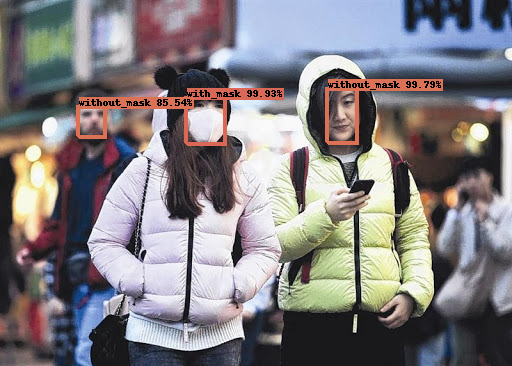

In [21]:
img = return_image("/content/drive/MyDrive/Đồ án/Lập trình song song ứng dụng/maksssksksss0.png")
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# 4. Tài liệu tham khảo



1.   https://dev.to/afrozchakure/all-you-need-to-know-about-yolo-v3-you-only-look-once-e4m#:~:text=Regarding%20the%20architecture%3A,underlying%20architecture%20for%20YOLO%20v3.
2.   https://phamdinhkhanh.github.io/2020/03/09/DarknetAlgorithm.html#:~:text=H%C3%ACnh%204%3A%20C%C3%A1c%20feature%20maps,l%C3%A0%2013x13%20%2C%2026x26%20v%C3%A0%2052x52%20.
3.https://bestinau.com.au/yolov3-architecture-best-model-in-object-detection/
